# Hospital Project: 3D visualisation of Dissected Nevres on the Skull
Realised by: Mohamed Firas Kooli \\
Supervised by:

*   Nicolas Van Vlasselaer   (Hospital Supervisor)
*   Jef Vandemeulebroucke (Academic Supervisor)

In the following documentation, you will find a walk-through about the project and how it was handled, enjoy!



# Data-Processing
During this phase, we take the raw DCOM files and turn them into a useful .stl mesh.

## 3D Slicer:
1. Segmentation: Thresholding and removing the unneeded parts.
2. Transformations: Rotations and translations so the skull's orientation is correct.
3. Exporting: Saving the file as .stl Mesh.
4. Reference points coordinates obtention: by using markup and manually marking the reference points then copying their coordinates


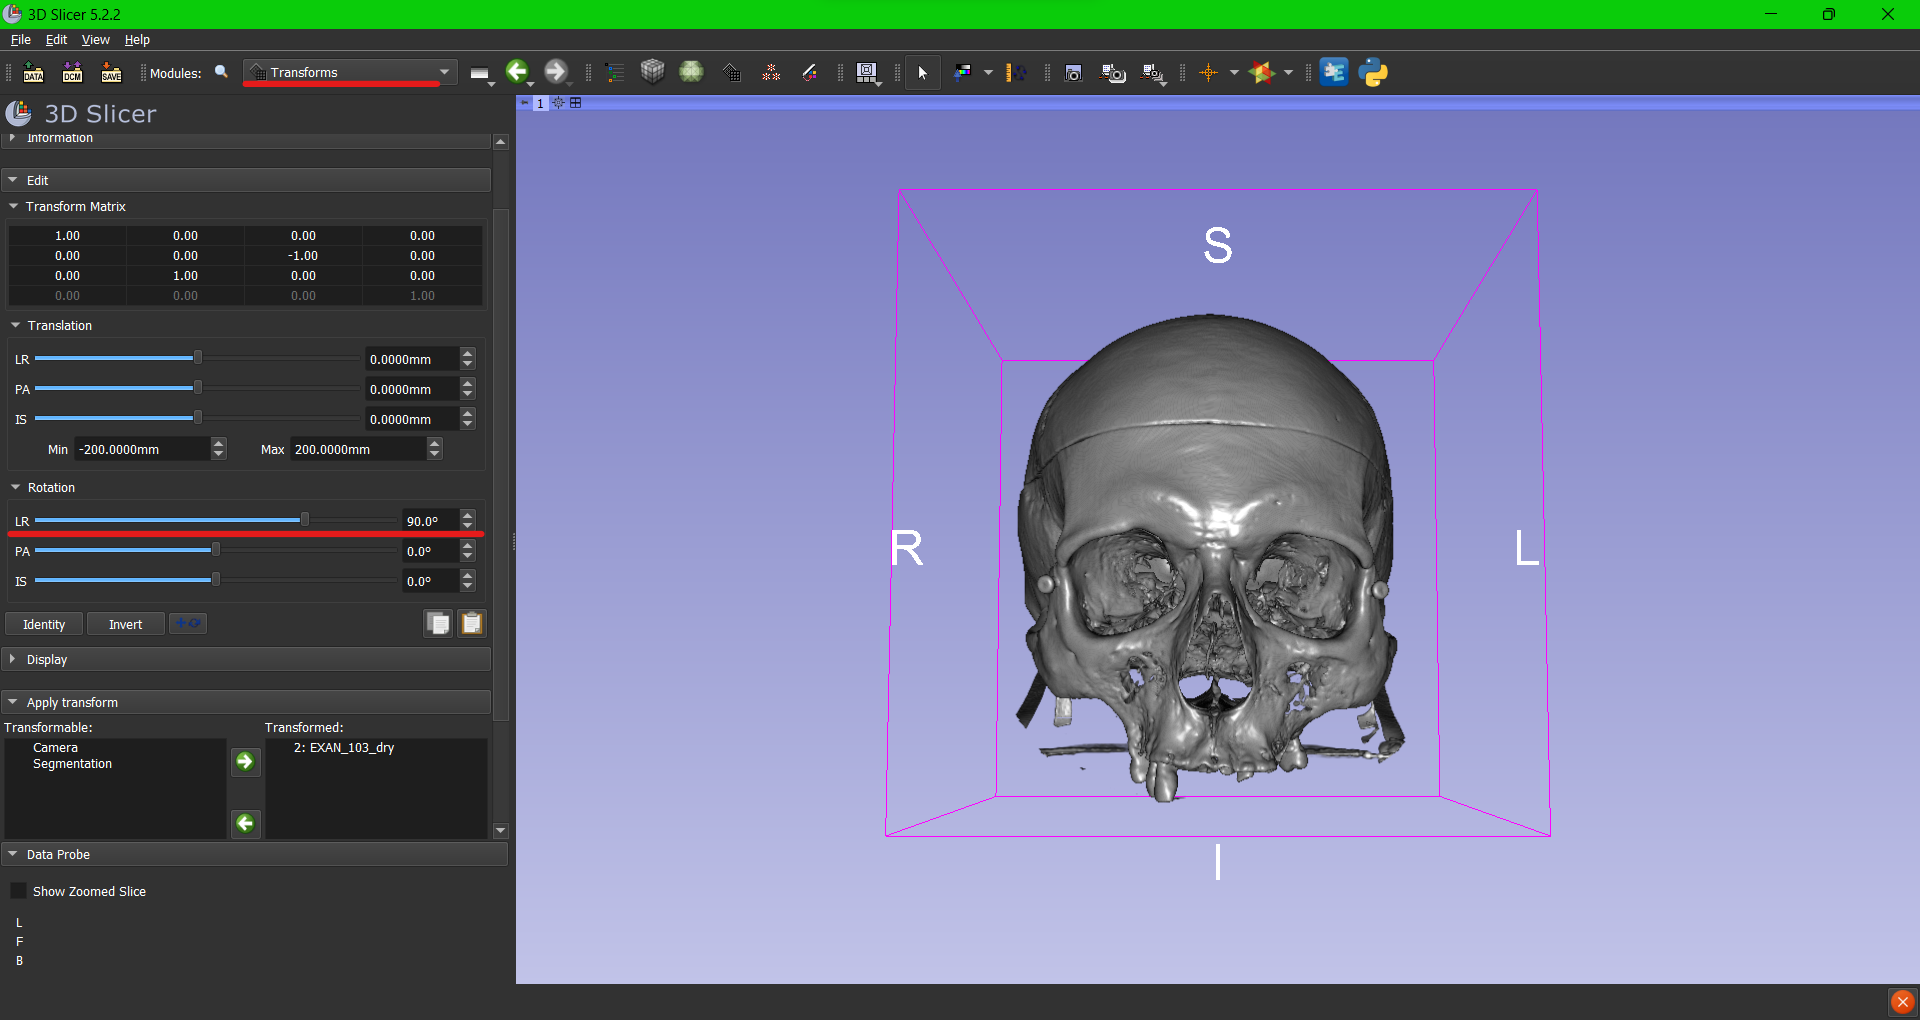


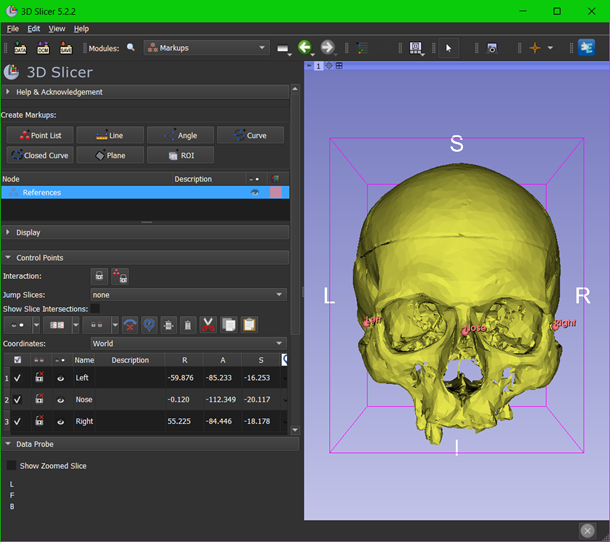

## Paraview
Paraview was mostly used to visualise the changes on the datasets while scripting the transformations as it provides a great set of tools and filters, like the girds, rotations, point view, etc. which help greatly in identifying the visualisation issues aand how to tackle them.

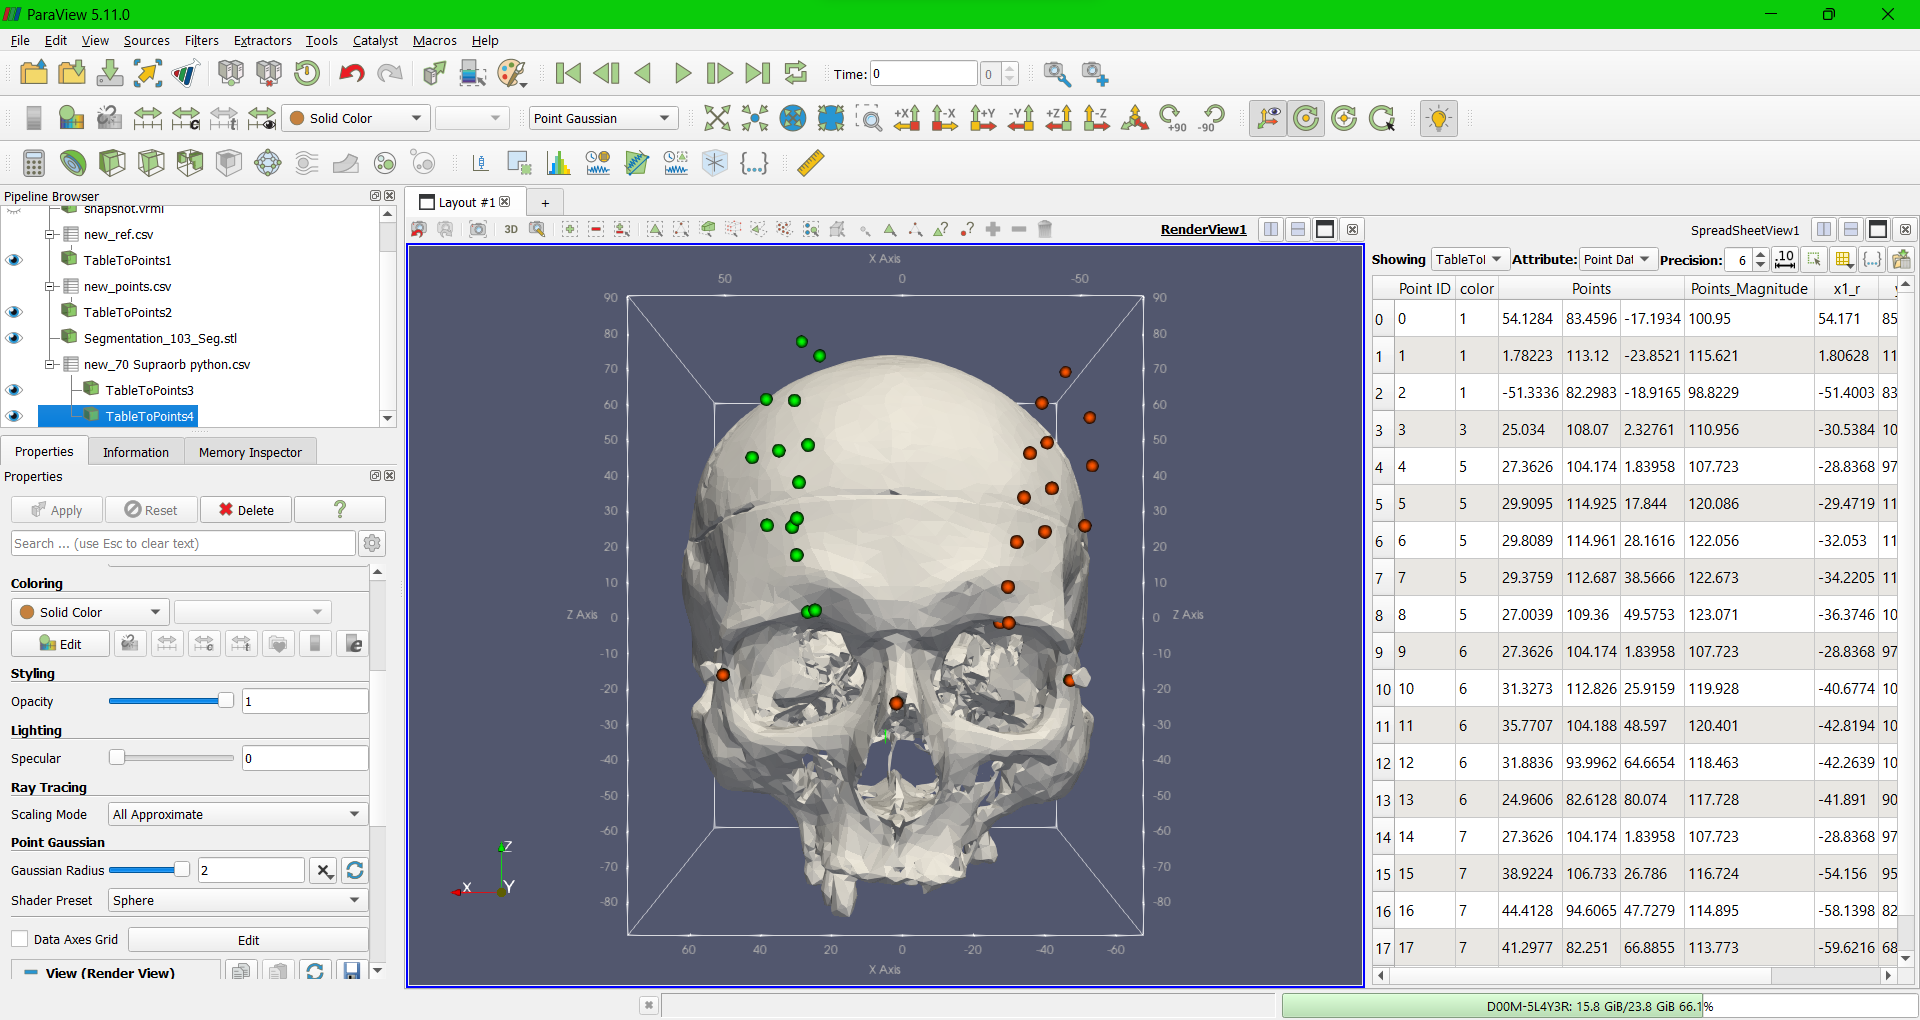

## MeshLab
MeshLab is used in this project to use the number of vertives in our mesh in order to mreduce its size and complexity, thus making rendering it faster.
To do so, we used the filter "Simplification: Quadratic Edge Collapse Decimation" then we choose the new number of vertices. \\
30k is a decent number.

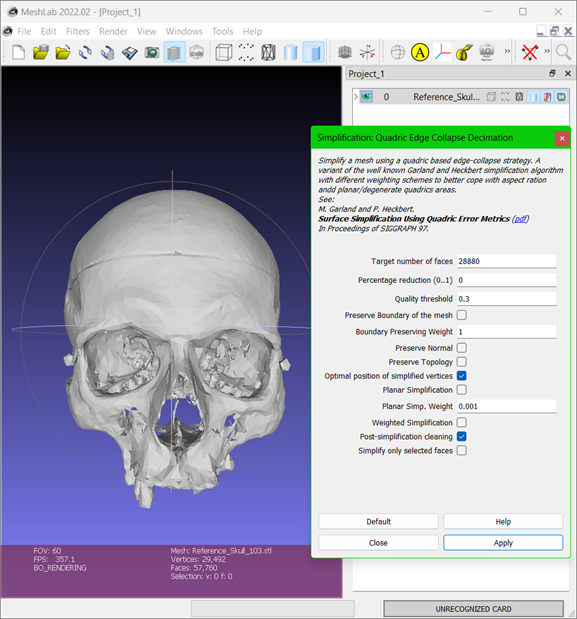

# Code
In this part, we will merge the datasets and the skull then tune them for optimal visualisation.

In [ ]:
# Imports
from helper_functions import *
import pandas as pd
import numpy as np
import  os
import csv
from mayavi import mlab # Visual Library

## Transformation
Before visualising, we have to solve a registration problem as our datasets were registred in a different space than the one we want to display them in.

In [ ]:
# Getting the absolute path of the directory of our script
script_dir = os.getcwd()

file_name = '80 Supraorb python'

# Constructing the relative file path
rel_path = f"Original Datasets\\{file_name}.xlsx"

# Merging both and this way our script is "location" independent
abs_file_path = os.path.join(script_dir, rel_path)

In [ ]:
# Reading Excel file
old_coordinates_df = pd.read_excel(abs_file_path)

# Temporarily saving the colours as they will be removed later
temporary_save_for_color_df = old_coordinates_df['color_l']

del old_coordinates_df['color_l']
del old_coordinates_df['color_r']
del old_coordinates_df['label_r']

old_coordinates_df

,label_l,x1_l,y1_l,z1_l,x1_r,y1_r,z1_r
0,hoek oogkast links,-159.9599,-186.9542,288.6918,-159.9334,-186.4643,288.6641
1,hoek oogkast rechts,-213.3635,-286.2545,286.6807,-212.7167,-286.6587,286.6376
2,botkraakbeen overgang neus,-194.8779,-234.4147,320.8625,-194.7085,-234.6321,320.9156
3,sulcus supra orbitalis,-159.0653,-226.3694,320.3101,-185.9039,-267.1856,313.9034
4,n supraorbitalis splitsing,-158.4329,-227.1864,313.2429,-185.1892,-268.0185,316.0640
5,MEDIAAL mid splitsing - mid,-153.6439,-228.3359,325.4304,-180.6581,-260.7637,322.1135
6,mid,-148.9649,-229.5447,325.8630,-172.8436,-262.5084,324.8013
7,mid dist - mid,-144.7222,-231.3157,326.2708,-167.0869,-265.4784,325.8040
8,mediale tak dist,-137.3780,-233.4674,325.5797,-160.7754,-268.3937,326.6563
9,n supraorbitalis splitsing,-158.4329,-227.1864,313.2429,-185.1892,-268.0185,316.0640


## Left Side

In [ ]:
# Extracting the reference points for both sides, left and right
old_reference_points = old_coordinates_df[0:3]

old_reference_points

,label_l,x1_l,y1_l,z1_l,x1_r,y1_r,z1_r
0,hoek oogkast links,-159.9599,-186.9542,288.6918,-159.9334,-186.4643,288.6641
1,hoek oogkast rechts,-213.3635,-286.2545,286.6807,-212.7167,-286.6587,286.6376
2,botkraakbeen overgang neus,-194.8779,-234.4147,320.8625,-194.7085,-234.6321,320.9156


In [ ]:
# Tuning the reference points by adding some offset, in this case to the Nose Point
x_tune_left_side  = 0; y_tune_left_side  = 0; z_tune_left_side  = 0
x_tune_right_side = 0; y_tune_right_side = 0; z_tune_right_side = 0

if file_name == '80 Supraorb python':
	x_tune_left_side = -13
	y_tune_left_side = -13
	z_tune_left_side = -13
	x_tune_right_side = -12
	y_tune_right_side = -12
	z_tune_right_side = -12

# Left Side

In [ ]:
# Extracting the Left side's reference points
right_eye = [old_reference_points.loc[0, 'x1_l'], old_reference_points.loc[0, 'y1_l'], old_reference_points.loc[0, 'z1_l']]

left_eye  = [old_reference_points.loc[1, 'x1_l'], old_reference_points.loc[1, 'y1_l'], old_reference_points.loc[1, 'z1_l']]

nose      = [old_reference_points.loc[2, 'x1_l'] + x_tune_left_side , old_reference_points.loc[2, 'y1_l']+ y_tune_left_side,
             old_reference_points.loc[2, 'z1_l'] + z_tune_left_side]

In [ ]:
# Calculating the least square transform (check the helper function for further details)
# The numerical coordinates were obtained from 3D Slicer
T, _, _ = least_square_transform([		left_eye, 					right_eye, 					nose			],
                                 [[-54.901, 84.476, -19.076], [58.355 , 85.368, -17.154], [1.123, 114.725, -23.732]])
print("Left Transformation= ", T)

Left Transformation=  [[0.4347360243866143, 0.8991692656329662, 0.049992207808745484, 287.01789608076865], [-0.37068890715555347, 0.12807913268649468, 0.9198834001557458, -217.01742320178465], [0.8207279227687713, -0.41843800916186763, 0.38899268537635834, -76.02067988677821], [0.0, 0.0, 0.0, 1.0]]


In [ ]:
# Extracting the left side and dropping the unneeded columns of the right side
old_points_left_side = old_coordinates_df.loc[0:20]

del old_points_left_side['label_l']
del old_points_left_side['x1_r']
del old_points_left_side['y1_r']
del old_points_left_side['z1_r']

old_points_left_side

,x1_l,y1_l,z1_l
0,-159.9599,-186.9542,288.6918
1,-213.3635,-286.2545,286.6807
2,-194.8779,-234.4147,320.8625
3,-159.0653,-226.3694,320.3101
4,-158.4329,-227.1864,313.2429
5,-153.6439,-228.3359,325.4304
6,-148.9649,-229.5447,325.8630
7,-144.7222,-231.3157,326.2708
8,-137.3780,-233.4674,325.5797
9,-158.4329,-227.1864,313.2429


In [ ]:
old_points_array = np.array(old_points_left_side)

# Applying the transform
homogeneous_points = np.concatenate([old_points_array, np.ones((old_points_left_side.shape[0], 1))], axis=1)
transformed_points = np.dot(homogeneous_points, np.transpose(T))

# Getting the new coordinates
new_points = transformed_points[:, :3]

# Saving the new coordinates in a df
new_points_df_left_side = pd.DataFrame(new_points, columns=old_points_left_side.columns)

# Adding colours again
new_points_df_left_side['color'] = temporary_save_for_color_df

# Switching the order of the first 2 columns so the nose is in the middle (for representation later)
row1 = new_points_df_left_side.iloc[1].copy()
row2 = new_points_df_left_side.iloc[2].copy()

new_points_df_left_side.iloc[1] = row2
new_points_df_left_side.iloc[2] = row1

# Dropping last 2 vlueless rows
new_points_df_left_side.drop(new_points_df_left_side.tail(2).index, inplace=True)

new_points_df_left_side

,x1_l,y1_l,z1_l,color
0,63.806435,83.895800,-16.776495,1
1,7.559584,120.354109,-13.061228,1
2,-48.798351,89.123648,-19.837604,1
3,30.335082,107.601066,12.749834,3
4,29.522083,100.761002,10.861637,5
5,31.179718,110.049625,20.013946,5
6,32.148559,108.558291,24.528218,5
7,32.420972,107.133870,28.910005,5
8,33.644468,103.500137,35.569115,5
9,29.522083,100.761002,10.861637,6


# Right Side

In [ ]:
# Extracting the Right side's reference points
right_eye = [old_reference_points.loc[0, 'x1_r'], old_reference_points.loc[0, 'y1_r'], old_reference_points.loc[0, 'z1_r']]

left_eye  = [old_reference_points.loc[1, 'x1_r'], old_reference_points.loc[1, 'y1_r'], old_reference_points.loc[1, 'z1_r']]

nose      = [old_reference_points.loc[2, 'x1_r'] + x_tune_right_side, old_reference_points.loc[2, 'y1_r']+ y_tune_right_side,
             old_reference_points.loc[2, 'z1_r'] + z_tune_right_side]

In [ ]:
# Calculating the least square transform (check the helper function for further details)
T,_ , _ = least_square_transform([        left_eye,                  right_eye,                  nose             ],
                                 [[-54.901, 84.476, -19.076], [58.355 , 85.368, -17.154], [1.123, 114.725, -23.732]])
print("Right Transformation= ", T)

Right Transformation=  [[0.4297814617490874, 0.9016500149213265, 0.04811596127263174, 286.6656057587382], [-0.34512762858788265, 0.11479956838090938, 0.9315084428414278, -218.80398838549633], [0.8343709098009843, -0.416951207807255, 0.36052305777293797, -65.14850693971276], [0.0, 0.0, 0.0, 1.0]]


In [ ]:
# Extracting the right side and dropping the unneeded columns of the left side
old_points_right_side = old_coordinates_df.loc[0:20]

del old_points_right_side['label_l']
del old_points_right_side['x1_l']
del old_points_right_side['y1_l']
del old_points_right_side['z1_l']

old_points_right_side

,x1_r,y1_r,z1_r
0,-159.9334,-186.4643,288.6641
1,-212.7167,-286.6587,286.6376
2,-194.7085,-234.6321,320.9156
3,-185.9039,-267.1856,313.9034
4,-185.1892,-268.0185,316.0640
5,-180.6581,-260.7637,322.1135
6,-172.8436,-262.5084,324.8013
7,-167.0869,-265.4784,325.8040
8,-160.7754,-268.3937,326.6563
9,-185.1892,-268.0185,316.0640


In [ ]:
old_points_array = np.array(old_points_right_side)

# Applying the transform
homogeneous_points = np.concatenate([old_points_array, np.ones((old_points_right_side.shape[0], 1))], axis=1)
transformed_points = np.dot(homogeneous_points, np.transpose(T))

# Getting the new coordinates
new_points = transformed_points[:, :3]

# Saving the new coordinates in a df
new_points_df_right_side = pd.DataFrame(new_points, columns=old_points_right_side.columns)


# Switching the order of the first 2 columns so the nose is in the middle of the 2 eyes
row1 = new_points_df_right_side.iloc[1].copy()
row2 = new_points_df_right_side.iloc[2].copy()

new_points_df_right_side.iloc[1] = row2
new_points_df_right_side.iloc[2] = row1

# Dropping last 2 vlueless rows
new_points_df_right_side.drop(new_points_df_right_side.tail(2).index, inplace=True)

new_points_df_right_side

,x1_r,y1_r,z1_r
0,63.693007,83.880472,-16.775704
1,6.868628,120.395222,-14.080004
2,-49.430066,88.707471,-19.770978
3,-19.036581,107.087460,4.311459
4,-19.376441,108.757797,6.034009
5,-10.596690,113.661998,8.970713
6,-8.681945,113.268416,17.187374
7,-8.837477,111.874688,23.590438
8,-8.712482,110.155665,30.379382
9,-19.376441,108.757797,6.034009


# Merge Both Sides

In [ ]:
# Constructing the absolute file path
file_name_without_extension = file_name.split(".xlsx")[0]
rel_path = f"Modified Datasets\\new_{file_name_without_extension}.csv"
abs_file_path = os.path.join(script_dir, rel_path)

new_points_df = pd.concat([new_points_df_right_side, new_points_df_left_side], axis=1)

# Saving to a .cvs file for visualisation in Paraview if needed
new_points_df.to_csv(abs_file_path, index=False)

new_points_df

,x1_r,y1_r,z1_r,x1_l,y1_l,z1_l,color
0,63.693007,83.880472,-16.775704,63.806435,83.895800,-16.776495,1
1,6.868628,120.395222,-14.080004,7.559584,120.354109,-13.061228,1
2,-49.430066,88.707471,-19.770978,-48.798351,89.123648,-19.837604,1
3,-19.036581,107.087460,4.311459,30.335082,107.601066,12.749834,3
4,-19.376441,108.757797,6.034009,29.522083,100.761002,10.861637,5
5,-10.596690,113.661998,8.970713,31.179718,110.049625,20.013946,5
6,-8.681945,113.268416,17.187374,32.148559,108.558291,24.528218,5
7,-8.837477,111.874688,23.590438,32.420972,107.133870,28.910005,5
8,-8.712482,110.155665,30.379382,33.644468,103.500137,35.569115,5
9,-19.376441,108.757797,6.034009,29.522083,100.761002,10.861637,6


# Visualisation

In [ ]:
# Loading mesh data from .STL file
src = mlab.pipeline.open("Reference_Skull_103.stl")
mesh = mlab.pipeline.surface(src)

In [ ]:
# Defining the color mapping dictionary
color_mapping = {
	5: (0.0, 1.0, 0.0),  # Green for Mediaal
	6: (0.0, 0.0, 1.0),  # Blue for Intermediaal
	7: (1.0, 0.0, 0.0),  # Red for Lateraal
}

In [ ]:
# Constructing the absolute file path
rel_path = f"Modified Datasets\\new_{file_name}.csv"
abs_file_path = os.path.join(script_dir, rel_path)

In [ ]:
# Splitting the data of the .csv file into right and left
lines_right_side = []
lines_left_side = []

with open(abs_file_path, 'r') as f:
	reader = csv.DictReader(f)
	for row in reader:
		lines_right_side.append([float(row['x1_r']), float(row['y1_r']), float(row['z1_r']), int(row['color'])])
		lines_left_side.append([float(row['x1_l']), float(row['y1_l']), float(row['z1_l']), int(row['color'])])

In [ ]:
# Grouping points with the same color value in a dictionary
points_right_side = {}
for line in lines_right_side:
	color = line[3]
	if color != 1:
		if color not in points_right_side:
			points_right_side[color] = []
		points_right_side[color].append(line[:3])

points_left_side = {}
for line in lines_left_side:
	color = line[3]
	if color != 1:
		if color not in points_left_side :
			points_left_side[color] = []
		points_left_side[color].append(line[:3])

In [ ]:
# Drawing lines between points with the same color value
for color, pts in points_right_side.items():
	pts = np.array(pts)
	if len(pts) > 1:
		line_color = color_mapping.get(color)
		mlab.plot3d(pts[:, 0], pts[:, 1], pts[:, 2], color=line_color, tube_radius=1, opacity=0.2)

for color, pts in points_left_side.items():
	pts = np.array(pts)
	if len(pts) > 1:
		line_color = color_mapping.get(color)
		mlab.plot3d(pts[:, 0], pts[:, 1], pts[:, 2], color=line_color, tube_radius=1, opacity=0.2)

In [ ]:
# Adding a custom legend using text annotations
mlab.text(-80, 0, 'Mediaal', z=40, width=0.2, color=(0.0, 1.0, 0.0))  # Green
mlab.text(-80, 0, 'Intermediaal', z=60, width=0.2, color=(0.0, 0.0, 1.0))  # Blue
mlab.text(-80, 0, 'Lateraal', z=80, width=0.2, color=(1.0, 0.0, 0.0))  # Red


In [ ]:
# Setting the desired orientation when the file is opened
mlab.view(azimuth=90, elevation=90, distance=450)

# Showing the plot
mlab.show()

KeyboardInterrupt: 